## Histogram Techniques:
Histograms capture the frequency distribution of a set of data (distribution of pixel intensities). And it turns out that examining these frequency distributions is a very nice way to build simple image processing techniques.                       

**Applications of histograms in image processing :**               
1. grayscale histograms for thresholding images.
2. for white balancing        
3. color histograms for object tracking in images, such as with the CamShift algorithm.                     
4. use histograms of image gradients to form the HOG and SIFT descriptors.                   
etc....           

### calcHist:

#### i. Histogram for Grayscale image:

Generating the histogram for grayscale image, which consist of single channel and the values between 0 (black) and 255 (white) which has gray levels in between.

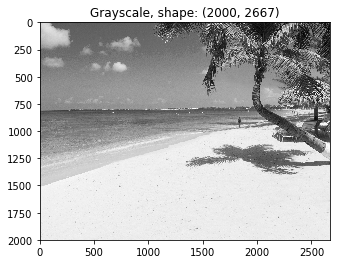

In [28]:
# importing library
import cv2
import matplotlib.pyplot as plt

# reading image and converting to grayscale using 0
image_gray= cv2.imread("./data/beach.jpg", 0)

# plotting the grasvale image
plt.title("Grayscale, shape: {}".format(image_gray.shape))
plt.imshow(image_gray,cmap= "gray")
plt.show()

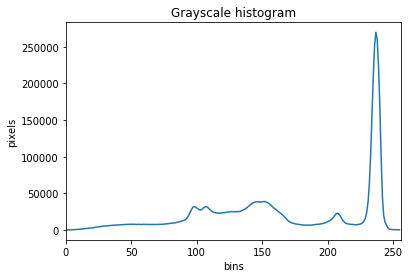

In [29]:
# histogram for gray-scale image

# images: in a list, channels: in a list (depending on number of channels used), mask: if mask is provided else None,
#histSize: number of bins used, ranges: x value ranges between 0-256
hist_gray= cv2.calcHist(images= [image_gray], channels= [0], mask= None, histSize= [256], ranges= [0,256])

plt.title("Grayscale histogram")
plt.plot(hist_gray)
plt.xlim([0,256])
plt.xlabel("bins")
plt.ylabel("pixels")
plt.show()

The analysis of this grayscale histogram interprets that mostly the object looks darker in the image where there is a highest peak in the values between [5,50]

#### ii. Histogram for Color Images:
The hsitogram for color images takes three channels into account and the user can provide the channels they can visualize. For ,RGB color image there ll be [0,1,2] channels

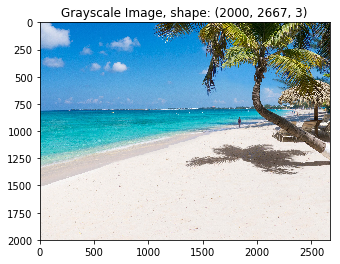

In [30]:
# importing library
import cv2
import matplotlib.pyplot as plt

# reading image
image_bgr= cv2.imread("./data/beach.jpg")

# converting to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# plotting the image
plt.title("Grayscale Image, shape: {}".format(image_rgb.shape))
plt.imshow(image_rgb)
plt.show()

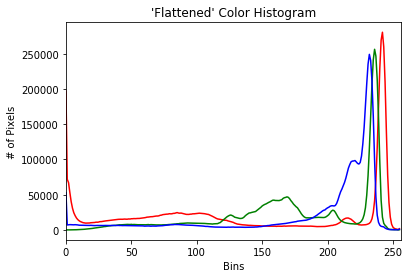

In [31]:
# histogram for color image
#hist_rgb= cv2.calcHist(images= [image_rgb], channels= [0,1,2], mask= None, histSize= [256,256], ranges= [0,256,0,256,0,256])

chans = cv2.split(image_rgb)
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

#### iii. Histogram only on masked part of the image

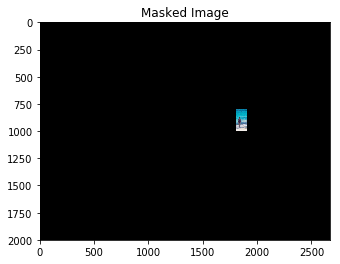

In [59]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading image
image_bgr= cv2.imread("./data/beach.jpg")

# converting to rgb
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# creating a mask of some random part using rectangle
mask_gray= np.zeros(image_rgb.shape[:2], dtype= np.uint8)

# jsut taking random mask as rectangle
mask_gray= cv2.rectangle(img= mask_gray, pt1= (1800,800), pt2= (1900,1000), color= 255, thickness= -1)

# masking the image
mask= cv2.bitwise_and(image_rgb, image_rgb, mask= mask_gray)

# plotting the mask
plt.title("Masked Image")
plt.imshow(mask)
plt.show()

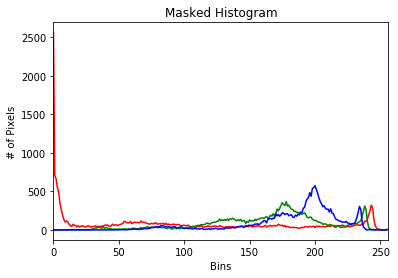

In [62]:
# histogram for masked image
chans = cv2.split(image_rgb)
colors = ("r", "g", "b")
plt.figure()
plt.title("Masked Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], mask_gray, [256],[0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    

### BackProjection:
Backprojection is a color histogram technique which is used to extract features from the image that have similar color representation.
The process uses color to address the classic problem of Classification and Localisation in computer vision.
This addresses the localization problem i.e. where is the object in an image. In this, we calculate the histogram model of a feature and then use it to find this feature in an image. 

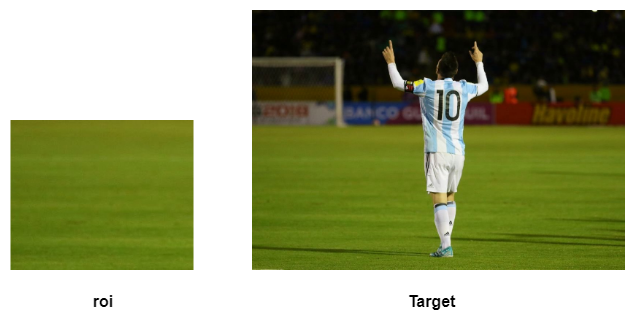

**Link:** https://theailearner.com/2019/04/18/histogram-backprojection/

### Histogram Equalization:
Histogram equalization is an image enhancement technique that adjusts the contrast of an image by using its histogram. To enhance the image’s contrast, it spreads out the most frequent pixel intensity values or stretches out the intensity range of the image that allows the image’s areas with lower contrast to gain a higher contrast. The resultant histogram will be normalized to the flattened profile (to the far ends).

Application : histogram equalization applied to X-ray scans and CT scans to improve the radiograph’s contrast. Doing so helps doctors and radiologists better interpret the scans and make an accurate diagnosis.

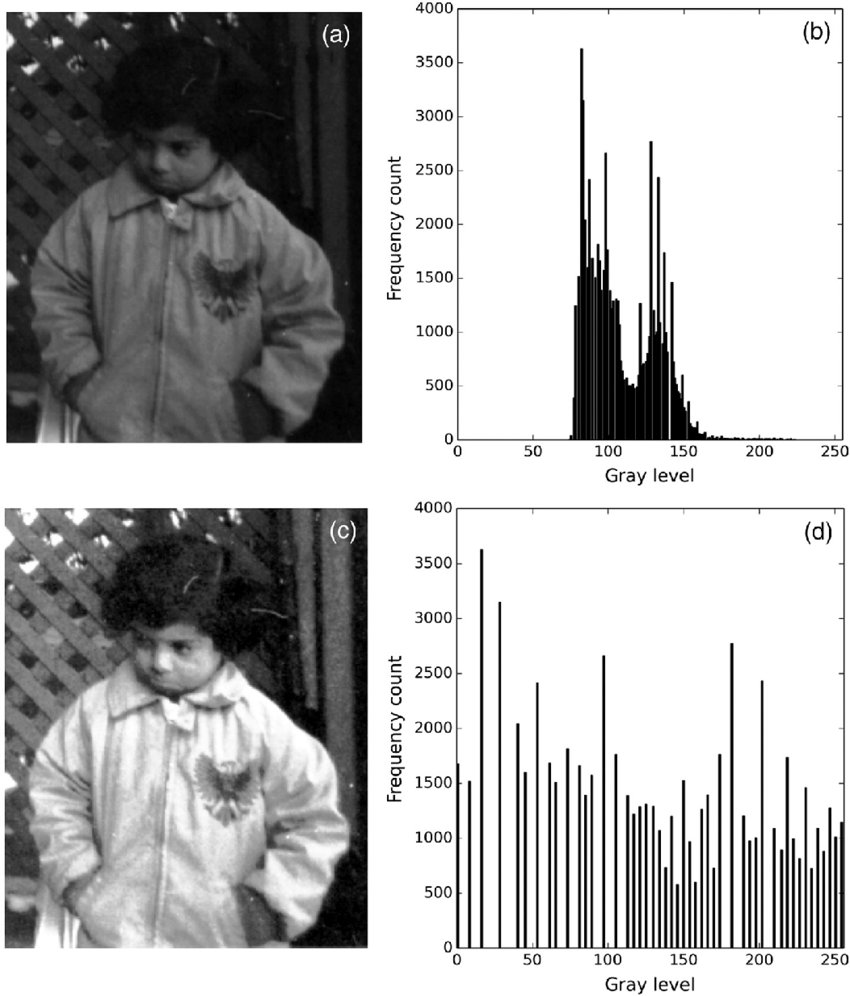

There are some advances in Histogram equalization method,                                 
1. **Adaptive Histogram Equalization**               - Adaptive histogram equalization utilizes the adaptive method to compute several histograms, each corresponding to a distinct section of the image and performs bilinear interpolation to avoid the breakage of each patches in the output image .                                                         
2. **Contrastive Limited Adaptive Equalization** - In CLAHE, the contrast implication is limited by clipping the histogram at a predefined value before computing the CDF. This clip limit depends on the normalization of the histogram or the size of the neighborhood region. The value between 3 and 4 is commonly used as the clip limit.                                      

**Link:** https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2

https://www.youtube.com/watch?v=uqeOrtAzSyU

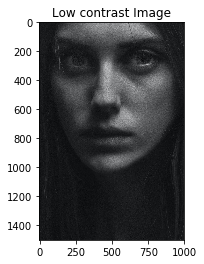

In [22]:
# importing library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# reading an image
image_bgr= cv2.imread("./data/grayscale.jpg")

# converting to rgb and grayscale
image_rgb= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray= cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# plotting the image
plt.title("Low contrast Image")
plt.imshow(image_rgb)
plt.show()

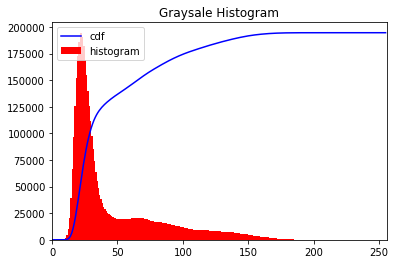

In [24]:
# plottting the histogram to check the intensity distribution of the image
hist,bins = np.histogram(image_rgb.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.title("Graysale Histogram")
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_rgb.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

After visualizing the histogram, we interpret that this image have low contrast because the peak is at one region or at one side and all other intensities are 0.

#### Applying Histogram Equalization:

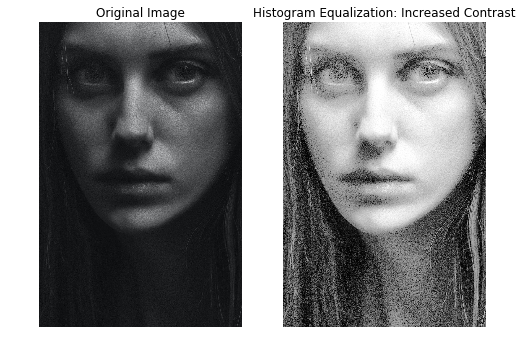

In [25]:
# histogram equalization
image_enhanced= cv2.equalizeHist(src= image_gray)

# plotting the images
# plotting the image
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(image_rgb, cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Histogram Equalization: Increased Contrast")
ax2.axis("off")
ax2.imshow(image_enhanced,cmap= "gray")
plt.show()

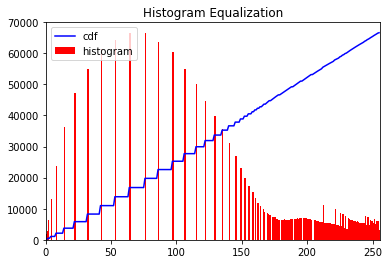

In [26]:
hist,bins = np.histogram(image_enhanced.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.title("Histogram Equalization")
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_enhanced.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

As,we can see the image gets very high contrast and leads to overamplify. This is the one disadvantage in normal histogram equalization. And , Adaptive histogram Equalization is computationaly expensive.To overcome these two problems, Contrast Limited Adaptive Histogram Equalization technique is introduced.

#### Applying CLAHE:
Contrast Limited Adaptive Histogram Equalization (CLAHE) is the advanced image Enhancement technique which is used to overcome the disadvantages of previous two methods.The histogram values gets clipped to the limit after setting adaptive method (patches across the image (8x8)). The clip limit works on each patch by clipping the values if it exceeds .Thus makes the whole image makes optimal contrast.



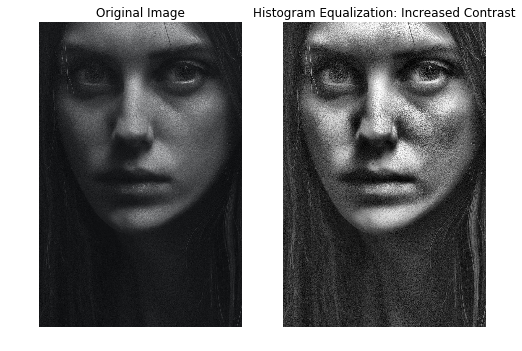

In [27]:
# histogram equalization
clahe_enhanced= cv2.createCLAHE(clipLimit= 3, tileGridSize= (8,8))
image_enhanced= clahe_enhanced.apply(image_gray)


# plotting the images
# plotting the image
fig = plt.figure(figsize = (8,8))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Original Image")
ax1.axis("off")
ax1.imshow(image_rgb, cmap= "gray")

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Histogram Equalization: Increased Contrast")
ax2.axis("off")
ax2.imshow(image_enhanced,cmap= "gray")
plt.show()

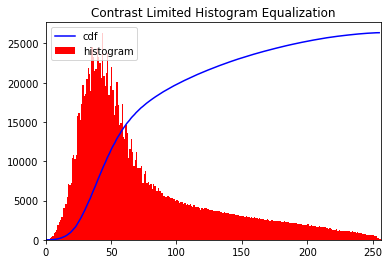

In [28]:
hist,bins = np.histogram(image_enhanced.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.title("Contrast Limited Histogram Equalization")
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_enhanced.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()